In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def readFile( inputFilePath ):
    inputFile = open( inputFilePath )
    
    x, y, z, t = [], [], [], []
    for line in inputFile:
      line = line.split( " " )
    
      # filter particles
      if line[0] != "opticalphoton":
        continue
    
      x.append( float( line[1] ) )
      y.append( float( line[2] ) )
      z.append( float( line[3] ) )
      t.append( float( line[4] ) )
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    t = np.array(t)
    
    # filter sensor edge
    #edgeVal = np.mode( y ) # most popular value should do it but this isn't the right command
    edgeVal = -22.0
    print( "Sensor edge y", edgeVal )
    yMask = (y==edgeVal)
    x = x[yMask]
    z = z[yMask]
    t = t[yMask]

    return x, z, t

In [3]:
def makePlots( x, z, t ):
    tmin, tmax, tbins = 0, 200, 10
    zmin, zmax, zbins = -8, 8, 8

    plt.hist( t, range=(tmin,tmax), bins=tbins )
    plt.xlabel("t")
    plt.show()
    
    plt.hist( z, range=(zmin,zmax), bins=zbins )
    plt.xlabel("z")
    plt.show()
    
    plt.hist2d( t, z, range=((tmin,tmax),(zmin,zmax)), bins=(tbins,zbins) )
    plt.xlabel("t")
    plt.ylabel("z")
    plt.show()

Sensor edge y -22.0


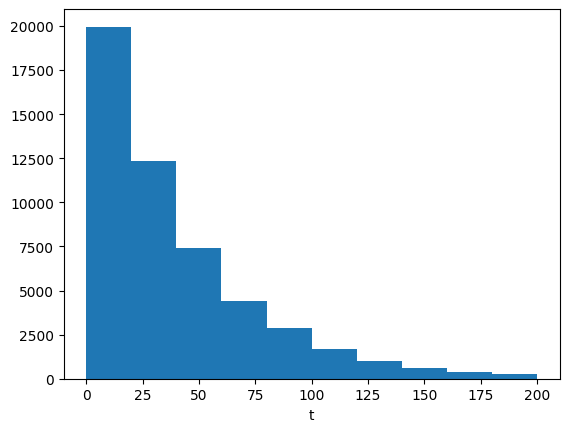

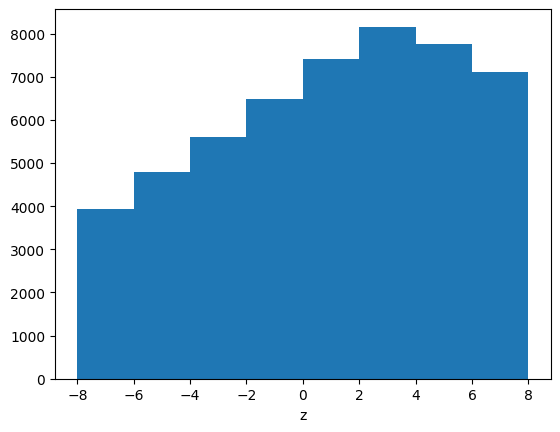

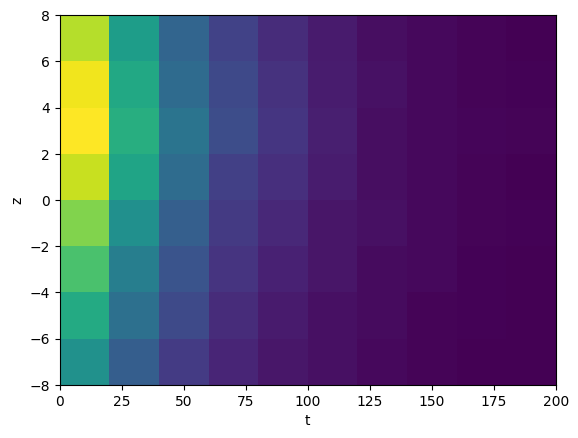

In [4]:
x, z, t = readFile( "hits.a150.n1000.csv" )
makePlots( x, z, t )

Sensor edge y -22.0


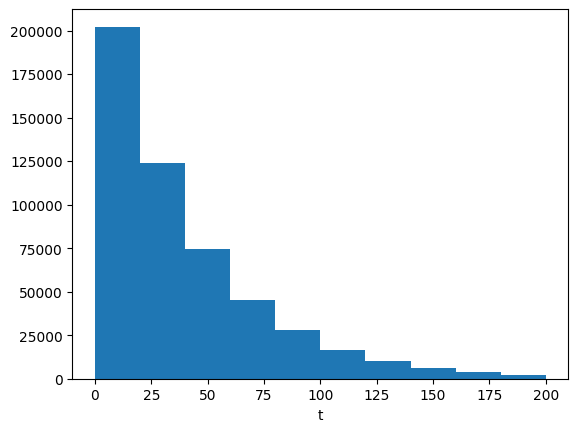

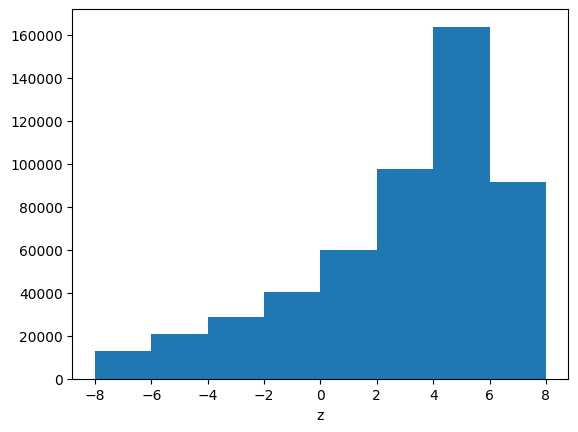

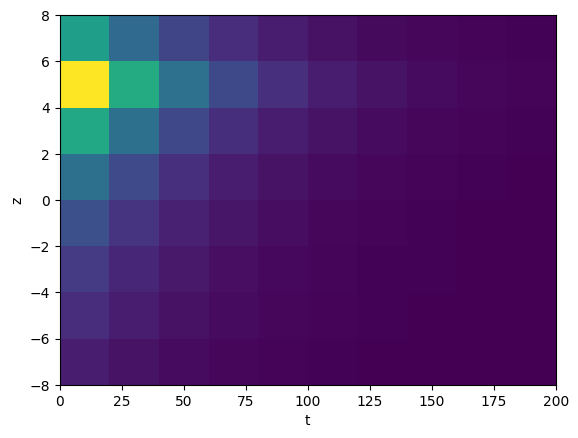

In [5]:
x, z, t = readFile( "hits.o5.n1000.csv" )
makePlots( x, z, t )